<a href="https://colab.research.google.com/github/Alona100/Assignment-2/blob/main/Assignment2_supervised_learning_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student.

In [ ]:
# Alona A. 7326

המטלה עוסקת בחיזוי ערך הבתים (בקליפורניה) באמצעות למידת מכונה, על בסיס הנתונים שקיבלנו. המטרה היא לבנות מודל רגרסיה שמנבא את ערך הבית .

## Part 2 - Initial Preparations
You could add as many code cells as needed

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import KFold


In [2]:
#loading_files
train_data = pd.read_csv('housing_train.csv')
test_data = pd.read_csv('housing_test.csv')

In [3]:
# first 5 rows of train
print("First 5 rows of training dataset:")
train_data.head()

First 5 rows of training dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250


In [4]:
# first 5 rows of test
print("First 5 rows of test dataset:")
test_data.head()

First 5 rows of test dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.3254,32.0,5.786260,1.033079,982.0,2.498728,34.29,-119.27,3.852
1,5.3032,52.0,5.095745,1.028369,980.0,3.475177,34.08,-118.12,2.457
2,4.1679,41.0,6.617486,1.371585,915.0,2.500000,37.05,-122.05,2.013
3,3.6429,28.0,5.249180,1.009836,848.0,2.780328,38.69,-121.41,1.052
4,2.7457,17.0,11.183267,2.107570,675.0,2.689243,38.88,-119.99,1.078



Basic statistics of the training dataset:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.863517     28.650678      5.412479      1.093546   1424.287609   
std        1.878577     12.623994      2.088680      0.378594   1139.012630   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.564375     18.000000      4.448665      1.005988    789.000000   
50%        3.536650     29.000000      5.225511      1.048780   1167.000000   
75%        4.744375     37.000000      6.046629      1.099691   1722.000000   
max       15.000100     52.000000     62.422222     15.312500  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  16512.000000  16512.000000  16512.000000  16512.000000  
mean       3.101201     35.631452   -119.566283      2.065267  
std       11.587773      2.137537      2.006552      

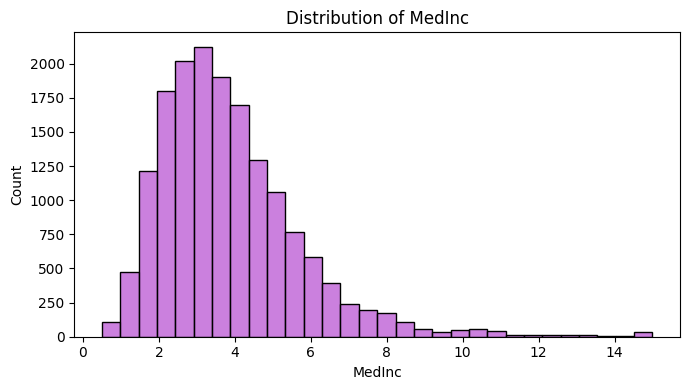

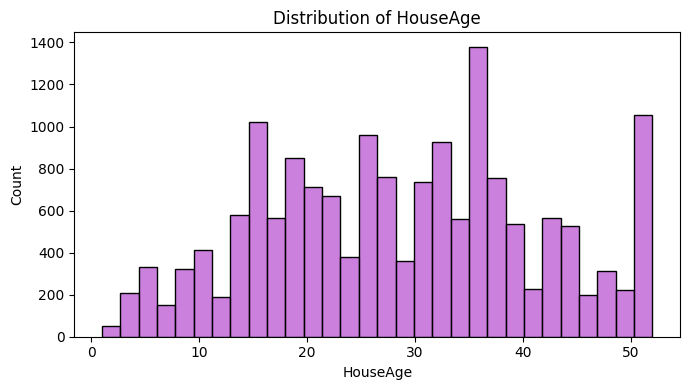

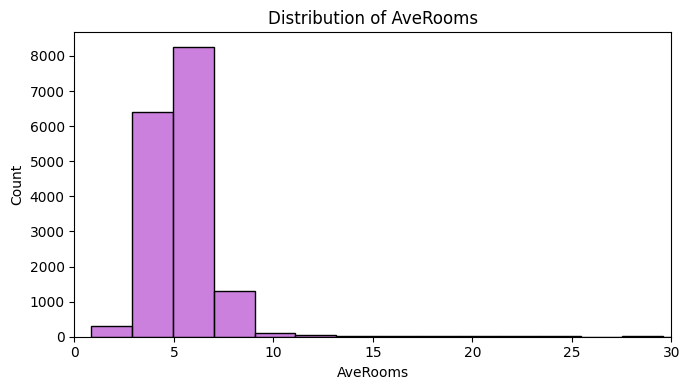

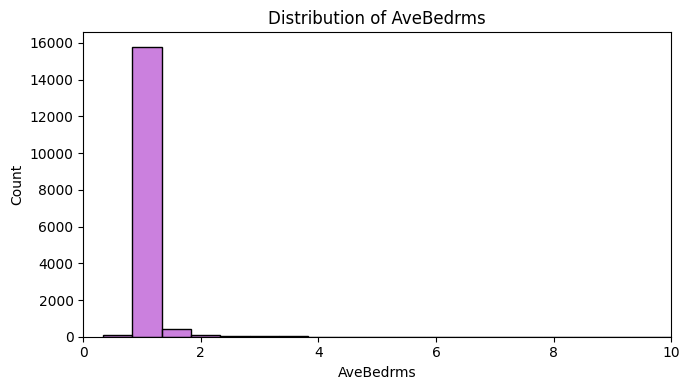

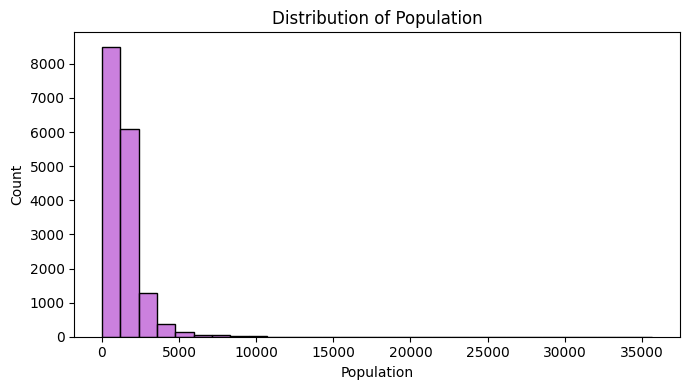

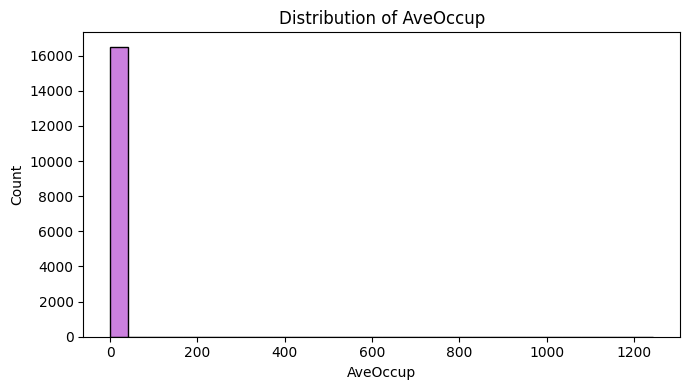

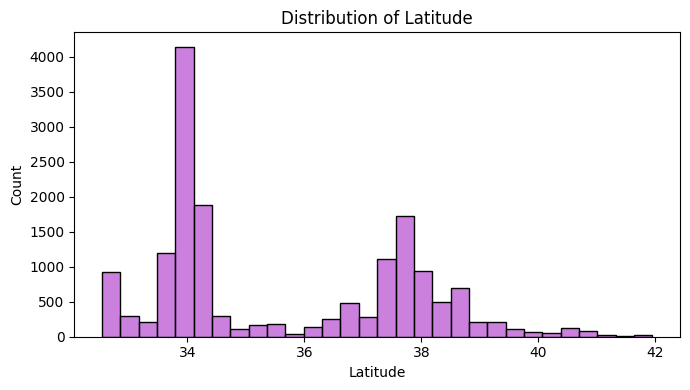

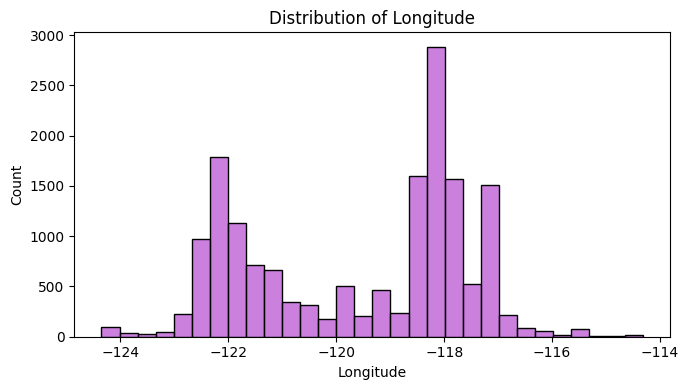

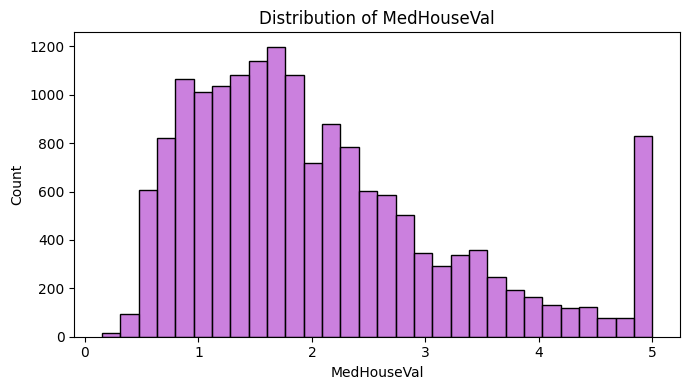

<Axes: >

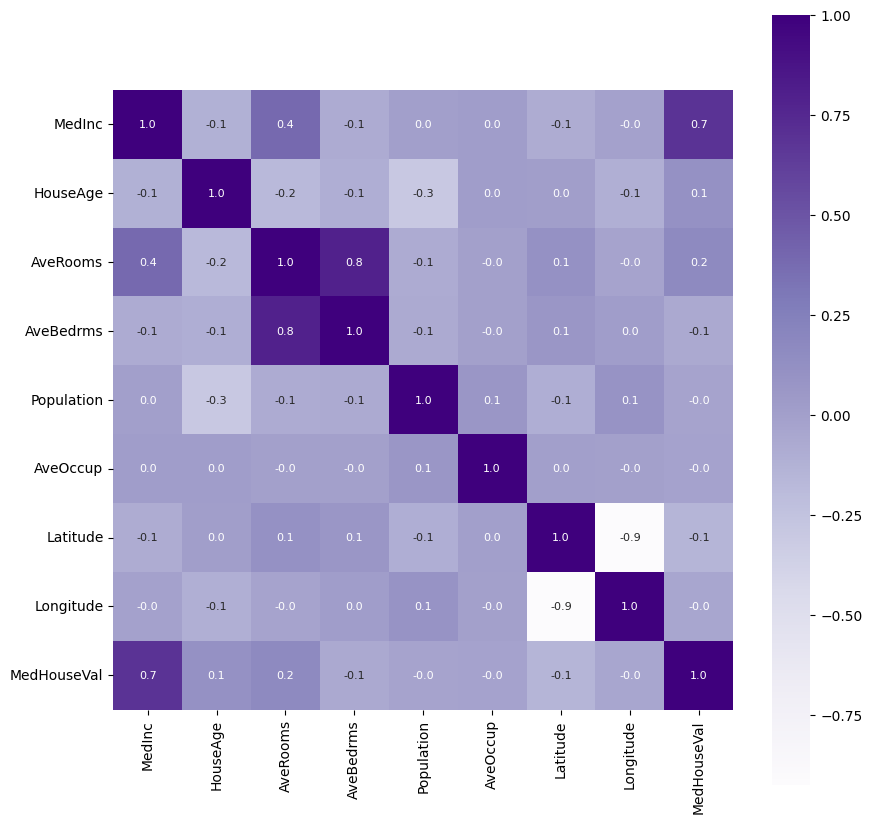

In [66]:
# EDA

#Tables
print("\nBasic statistics of the training dataset:")
print(train_data.describe())

print("\nBasic statistics of the test dataset:")
print(test_data.describe())

# Histograms
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = train_data.select_dtypes(include=[np.number]).columns

print("\n Distributions of numerical features:")
for column in numeric_columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(train_data[column], bins=30, kde=False, color='mediumorchid')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    if column in ["AveRooms"]:
        plt.xlim(0, 30)
    if column in ["AveBedrms"]:
        plt.xlim(0, 10)
    plt.tight_layout()
    plt.show()

#HEATMAP
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Purples')

In [6]:
# Check for any NaN values and remove or impute
missing_values = train_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# we can see that there is no missing data, so no need to handle it
train_data = train_data.dropna()

Missing values in each column:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


## Part 3 - Experiments
You could add as many code cells as needed

In [15]:
# Scaling using StandardScaler
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns)
test_scaled = pd.DataFrame(scaler.transform(test_data), columns=test_data.columns)


# Display the scaled DataFrames
#display("Scaled Train DataFrame (Training):", train_scaled)
#display("Scaled Test DataFrame (Test):", test_scaled)

In [16]:
# complex feature engineering (bonus)
# Rooms per household

train_scaled['RoomsPerHousehold'] = train_scaled['AveRooms'] / train_scaled['AveOccup']
test_scaled['RoomsPerHousehold'] = test_scaled['AveRooms'] / test_scaled['AveOccup']

# Bedrooms per household
train_scaled['BedroomsPerHousehold'] = train_scaled['AveBedrms'] / train_scaled['AveOccup']
test_scaled['BedroomsPerHousehold'] = test_scaled['AveBedrms'] / test_scaled['AveOccup']

# Population per household
train_scaled['PopulationPerHousehold'] = train_scaled['Population'] / train_scaled['AveOccup']
test_scaled['PopulationPerHousehold'] = test_scaled['Population'] / test_scaled['AveOccup']

# Log transformation for highly skewed features
train_scaled['LogPopulation'] = np.log1p(train_scaled['Population'])
test_scaled['LogPopulation'] = np.log1p(test_scaled['Population'])

# Display the scaled DataFrames after complex feature engineering
display("Scaled Train DataFrame (Training):", train_scaled)
display("Scaled Test DataFrame (Test):", test_scaled)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


'Scaled Train DataFrame (Training):'

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,RoomsPerHousehold,BedroomsPerHousehold,PopulationPerHousehold,LogPopulation
0,0.082183,1.374355,-0.600296,-0.160600,-0.800970,-0.156336,-0.730513,0.606174,1.246310,3.839789,1.027274,5.123397,-1.614301
1,-0.619273,-1.794310,-0.604818,0.228333,2.342198,-0.070239,-0.739870,1.124491,-1.027001,8.610853,-3.250798,-33.346080,1.206629
2,-1.377316,-0.922928,-0.948067,-0.187514,-0.087173,-0.052695,-0.566769,-0.061659,0.408911,17.991577,3.558472,1.654283,-0.091208
3,0.569961,-0.447628,0.154800,-0.106568,2.770652,0.088773,-0.744549,0.815494,-0.221743,1.743787,-1.200460,31.210671,1.327248
4,-0.845355,-0.606061,-0.645342,-0.347262,0.601164,-0.012006,-1.427598,1.224168,-0.708199,53.750107,28.923179,-50.070516,0.470731
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.137322,-0.289194,1.124246,-0.023133,-0.286474,-0.031331,-0.866188,0.755689,1.276713,-35.882765,0.738348,9.143440,-0.337536
16508,3.806338,-1.002144,0.907065,-0.086522,-0.488409,-0.039949,-0.931686,0.875300,2.046356,-22.705710,2.165815,12.225890,-0.670231
16509,0.853855,0.265322,0.362659,-0.212566,0.321088,-0.015220,0.761904,-1.168067,0.474062,-23.827243,13.965939,-21.095978,0.278456
16510,-1.155333,0.661405,-0.359332,0.035650,-0.512115,-0.063188,1.360742,-0.958747,-1.112999,5.686708,-0.564185,8.104609,-0.717675


'Scaled Test DataFrame (Test):'

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,RoomsPerHousehold,BedroomsPerHousehold,PopulationPerHousehold,LogPopulation
0,0.778210,0.265322,0.178961,-0.159719,-0.388320,-0.051994,-0.627588,0.147662,1.552082,-3.441967,3.071896,7.468584,-0.491545
1,0.766392,1.849655,-0.151648,-0.172161,-0.390076,0.032274,-0.725835,0.720802,0.340287,-4.698720,-5.334296,-12.086256,-0.494420
2,0.162033,0.978272,0.576940,0.734420,-0.447144,-0.051884,0.663657,-1.237841,-0.045403,-11.119824,-14.155059,8.618163,-0.592658
3,-0.117442,-0.051545,-0.078185,-0.221114,-0.505969,-0.027692,1.430918,-0.918876,-0.880196,2.823433,7.984888,18.271621,-0.705157
4,-0.595052,-0.922928,2.762971,2.678474,-0.657860,-0.035552,1.519808,-0.211173,-0.857610,-77.715934,-75.339221,18.504052,-1.072534
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,4.405160,-0.447628,1.364256,-0.227772,2.120947,-0.025211,0.808688,-1.282695,2.549325,-54.113577,9.034641,-84.127914,1.138137
4124,-0.704606,-0.209978,-0.554858,-0.144385,1.458950,-0.042510,-0.852152,1.528181,-0.970537,13.052481,3.396512,-34.320321,0.899735
4125,1.316399,1.532788,0.505166,-0.238080,-0.476996,-0.008145,-0.838117,0.715818,0.876256,-62.024398,29.231510,58.565657,-0.648165
4126,-1.462756,-0.843711,-1.363934,-0.341808,-0.543722,-0.129245,2.446136,-2.249557,-0.491031,10.553091,2.644650,4.206912,-0.784653


In [17]:
missing_values = train_scaled.isnull().sum()
print("Missing values in each column:\n", missing_values)
train_scaled.dropna(inplace=True)

missing_values = test_scaled.isnull().sum()
print("Missing values in each column:\n", missing_values)
test_scaled.dropna(inplace=True)


#define features and target (x and y)
x = train_scaled.drop(['MedHouseVal'],axis = 1) # X - features
y = train_scaled['MedHouseVal'] # Y target

display(y)

Missing values in each column:
 MedInc                      0
HouseAge                    0
AveRooms                    0
AveBedrms                   0
Population                  0
AveOccup                    0
Latitude                    0
Longitude                   0
MedHouseVal                 0
RoomsPerHousehold           0
BedroomsPerHousehold        0
PopulationPerHousehold      0
LogPopulation             625
dtype: int64
Missing values in each column:
 MedInc                      0
HouseAge                    0
AveRooms                    0
AveBedrms                   0
Population                  0
AveOccup                    0
Latitude                    0
Longitude                   0
MedHouseVal                 0
RoomsPerHousehold           0
BedroomsPerHousehold        0
PopulationPerHousehold      0
LogPopulation             148
dtype: int64


,MedHouseVal
0,1.246310
1,-1.027001
2,0.408911
3,-0.221743
4,-0.708199
...,...
16507,1.276713
16508,2.046356
16509,0.474062
16510,-1.112999


In [18]:
# Linear reg

# define the model
reg = LinearRegression()
# training model
reg.fit(x, y)

# prediction
linreg_prediction = reg.predict(x)

# Calculate R-squared
r2_linReg= r2_score(y, linreg_prediction)

print("R^2 Score is : ",r2_linReg)

R^2 Score is :  0.6292470163381811


In [19]:
# Random forest Reg

rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
# Train the model
rf_regressor.fit(x, y)

# Make predictions
rf_predictions = rf_regressor.predict(x)

# Calculate R-squared
rf_r2 = r2_score(y,rf_predictions)

# Print the result
print("R^2 Score:", rf_r2)

R^2 Score: 0.9744788599068093


In [20]:
# complex model -  XGBoost Regressor
xgb_reg = XGBRegressor()
xgb_reg.fit(x,y)
xgb_reg_prediction = xgb_reg.predict(x)
xgb_r2 = r2_score(y, xgb_reg_prediction)
print('R^2: score is', xgb_r2)

R^2: score is 0.9492467780496816


In [21]:
# grid search for linear regression
# for linear regression there is only one possible hyper paremeter
kfold = KFold(n_splits=5, shuffle=True, random_state=42) #K-fold validation
kf_grid_search = GridSearchCV(LinearRegression(), param_grid={'fit_intercept': [True,False],'positive': [True,False]}, cv=kfold ,scoring='r2') #K-fold using Gridsearch with R2 scoring
kf_grid_search.fit(x,y) #Fitting model

best_estimator = kf_grid_search.best_estimator_  ##returns the best model
results_df = pd.DataFrame(kf_grid_search.cv_results_)[['params', 'mean_test_score']] ##dataframe to compare results for every hyperparameter
display(results_df)
r2_linReg = kf_grid_search.best_score_
print('linear regression r2 score: ',r2_linReg)
print('\nBest hyperparameters:\n',kf_grid_search.best_params_)

,params,mean_test_score
0,"{'fit_intercept': True, 'positive': True}",0.522994
1,"{'fit_intercept': True, 'positive': False}",0.626219
2,"{'fit_intercept': False, 'positive': True}",0.523038
3,"{'fit_intercept': False, 'positive': False}",0.626252


linear regression r2 score:  0.6262523519949472

Best hyperparameters:
 {'fit_intercept': False, 'positive': False}


In [25]:
# grid search for random forest
# Set up the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],  # Try fewer trees for faster evaluation
    'max_depth': [10, 20, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
}

# Set up the GridSearchCV
random_forest_grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Perform the grid search on the training data
random_forest_grid_search.fit(x, y)

# Get the best model from the grid search
best_rf = random_forest_grid_search.best_estimator_

# Print the best parameters found by the grid search
print("Best Parameters from Grid Search: ", random_forest_grid_search.best_params_)

# Make predictions on the test data
rf_predictions = best_rf.predict(x)

# Evaluate the model using R² score

rf_r2 = r2_score(y, rf_predictions)

# Print the evaluation metrics
print("R² Score:", rf_r2)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters from Grid Search:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R² Score: 0.9742449989267518


In [26]:
# grid seach XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Use GridSearchCV to find the best hyperparameters
XGBoost_gridSearch = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
XGBoost_gridSearch.fit(x, y)

# Get the best model and parameters
best_xgb = XGBoost_gridSearch.best_estimator_

# Predictions
rgb_predictions = best_xgb.predict(x)
# Calculate and R-squared
xgb_r2 = r2_score(y, rgb_predictions)

# Print results
print("Best Parameters from GridSearch: ", XGBoost_gridSearch.best_params_)
print("R^2 Score:", xgb_r2)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters from GridSearch:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
R^2 Score: 0.9605469349698134


In [27]:
# table of all r^2 error to choose the best
# Create a DataFrame with one row and three columns
data = {'linear reregressions': [r2_linReg], 'random forest regression': [rf_r2], 'XGBoost': [xgb_r2]}
df = pd.DataFrame(data)
# Display the DataFrame
print(df)

   linear reregressions  random forest regression   XGBoost
0              0.626252                  0.974245  0.960547


## Part 4 - Training
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [28]:
# we can see that random forest is the best model
best_model = best_rf
# using the best model on train again
best_model.fit(x, y)
best_model_prediction = best_model.predict(x)
best_r2 = r2_score(y,best_model_prediction)
print("The best model r^2 score is: ",best_r2)

The best model r^2 score is:  0.9742449989267518


## Part 5 - Apply on test and show model performance estimation

In [29]:
# apply best model on test
# define features and target (x and y)
x_test = test_scaled.drop(['MedHouseVal'],axis = 1) # X - features
y_test = test_scaled['MedHouseVal'] # Y target
best_model.fit(x_test,y_test)
best_model_prediction = best_model.predict(x_test)

In [30]:
# Create the DataFrame comparing Actual and predicted values
results_test_df = pd.DataFrame({
    'Actual': y_test,  # First 5 rows of actual values
    'predicted': best_model_prediction  # First 5 rows of predicted values
})
results_test_df.head()
# Reset the index to have a simple sequential index (0, 1, 2, ...)
results_test_df = results_test_df.reset_index(drop=True)

print(results_test_df)

r2_test = r2_score(y_test, best_model_prediction)

print("R^2 final Score: is ",r2_test)

        Actual  predicted
0     1.552082   1.410997
1     0.340287   0.217500
2    -0.045403   0.126932
3    -0.880196  -0.853271
4    -0.857610  -0.792864
...        ...        ...
3975  2.549325   2.499154
3976 -0.970537  -0.904618
3977  0.876256   1.061735
3978 -0.491031  -0.567965
3979 -0.856742  -0.619534

[3980 rows x 2 columns]
R^2 final Score: is  0.970708299311141


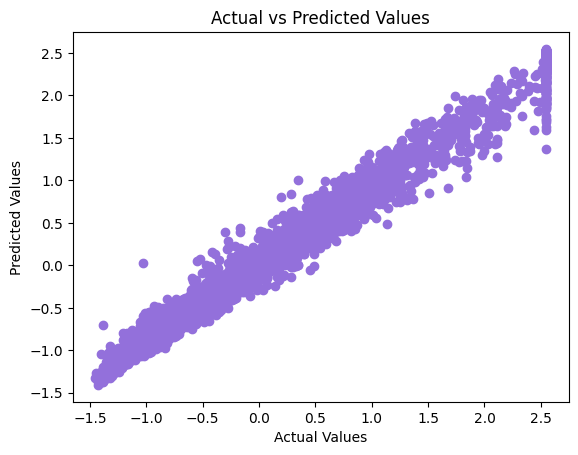

In [34]:
# visualtions of the test target values vs predicted
plt.scatter(results_test_df['Actual'], results_test_df['predicted'],color='mediumpurple')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()